# 📉 경사 하강법

### 📥 Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

### 🔍 기울기 함수

In [3]:
def _numerical_gradient_without_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for i in range(x.size):
        tmp = x[i]
        
        x[i] = float(tmp) + h
        fxh1 = f(x)
        x[i] = tmp - h
        fxh2 = f(x)
        grad[i] = (fxh1 - fxh2) / (2 * h)
        
        x[i] = tmp

    return grad


def numerical_gradient(f, x):
    if x.ndim == 1:
        return _numerical_gradient_without_batch(f, x)

    grad = np.zeros_like(x)
    for i, x_i in enumerate(x):
        grad[i] = _numerical_gradient_without_batch(f, x_i)

    return grad

### 📉 경사 하강법 함수

In [4]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for _ in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

### 🔬 임의의 함수에 대한 테스트

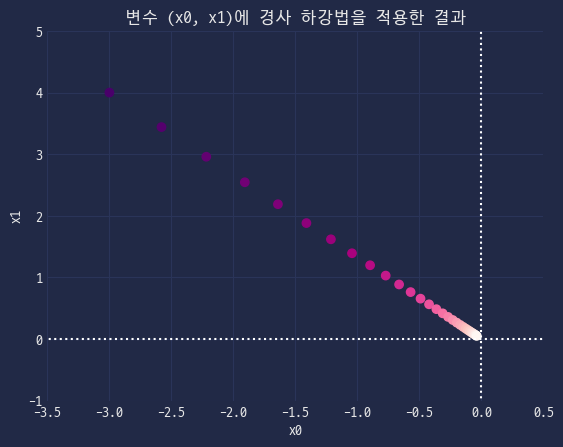

In [20]:
def function_1(x):
    return x[0] ** 2 +x[1] ** 2


initial_x = np.array([-3.0, 4.0])
learning_rate = 0.07
step_num = 30
_, x_history = gradient_descent(function_1, initial_x, lr=learning_rate, step_num=step_num)

plt.plot([-5, 5], [0,0], ':w')
plt.plot([0,0], [-5, 5], ':w')

i, x, y = [], [], []
for i_, (x_, y_) in enumerate(x_history[:]):
    i.append(-i_)
    x.append(x_)
    y.append(y_)

plt.scatter(x, y, c=i)

plt.xlim(-3.5, 0.5)
plt.ylim(-1.0, 5.0)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('변수 (x0, x1)에 경사 하강법을 적용한 결과')
plt.show()